In [40]:
import numpy as np
#from tofu.utils import diag_to_array,diag_to_dict
from tofu.config import data_dir
import pandas as pd
import h5py
import os
import matplotlib.pyplot as plt

In [2]:
# utils

def diag_to_array(data):
    dataset, num_diag = [], len(data["0"].keys())
    for dim in data.keys():
        X = []
        for diag in range(num_diag):
            pers_diag = np.array(data[dim][str(diag)])
            X.append(pers_diag)
        dataset.append(X)
    return dataset

def diag_to_dict(D):
    X = dict()
    for f in D.keys():
        df = diag_to_array(D[f])
        for dim in range(len(df)):
            X[str(dim) + "_" + f] = df[dim]
    return X

In [3]:
# load data
os.chdir(data_dir)
train_lab  = pd.read_csv("train.csv")
train_diag = diag_to_dict(h5py.File("train_diag.hdf5", "r"))
dgms,labels = train_diag['1_geodesic'], np.array([int(lab) for lab in train_lab['part']])

In [18]:
# partition data by class
unique_labels = np.unique(labels)
classes = {0:[],1:[],2:[],3:[]}

for i,label in enumerate(labels):
    class_key = np.where(unique_labels == label)[0][0]
    classes[class_key].append(dgms[i])

In [37]:
# class statistics

n_dgms = [len(lst) for lst in classes.values()] # number of observations in each class
n_points = [np.array([len(dgm) for dgm in lst]) for lst in classes.values()]
mu_n_points = [np.mean(n) for n in n_points]
sd_n_points = [np.std(n) for n in n_points]

for label in unique_labels:
    print('Class ' + str(label) + ' has ' + str(n_dgms[label]) + ' observations. The mean number of points is ' + str(mu_n_points[label]) + ' with a sdev of ' + str(sd_n_points[label]) + '.')

Class 0 has 2442 observations. The mean number of points is 12.056511056511056 with a sdev of 4.82495396702044.
Class 1 has 2098 observations. The mean number of points is 11.040991420400381 with a sdev of 4.426955882761308.
Class 2 has 539 observations. The mean number of points is 13.896103896103897 with a sdev of 6.135480593372828.
Class 3 has 621 observations. The mean number of points is 12.0402576489533 with a sdev of 4.906204550344054.


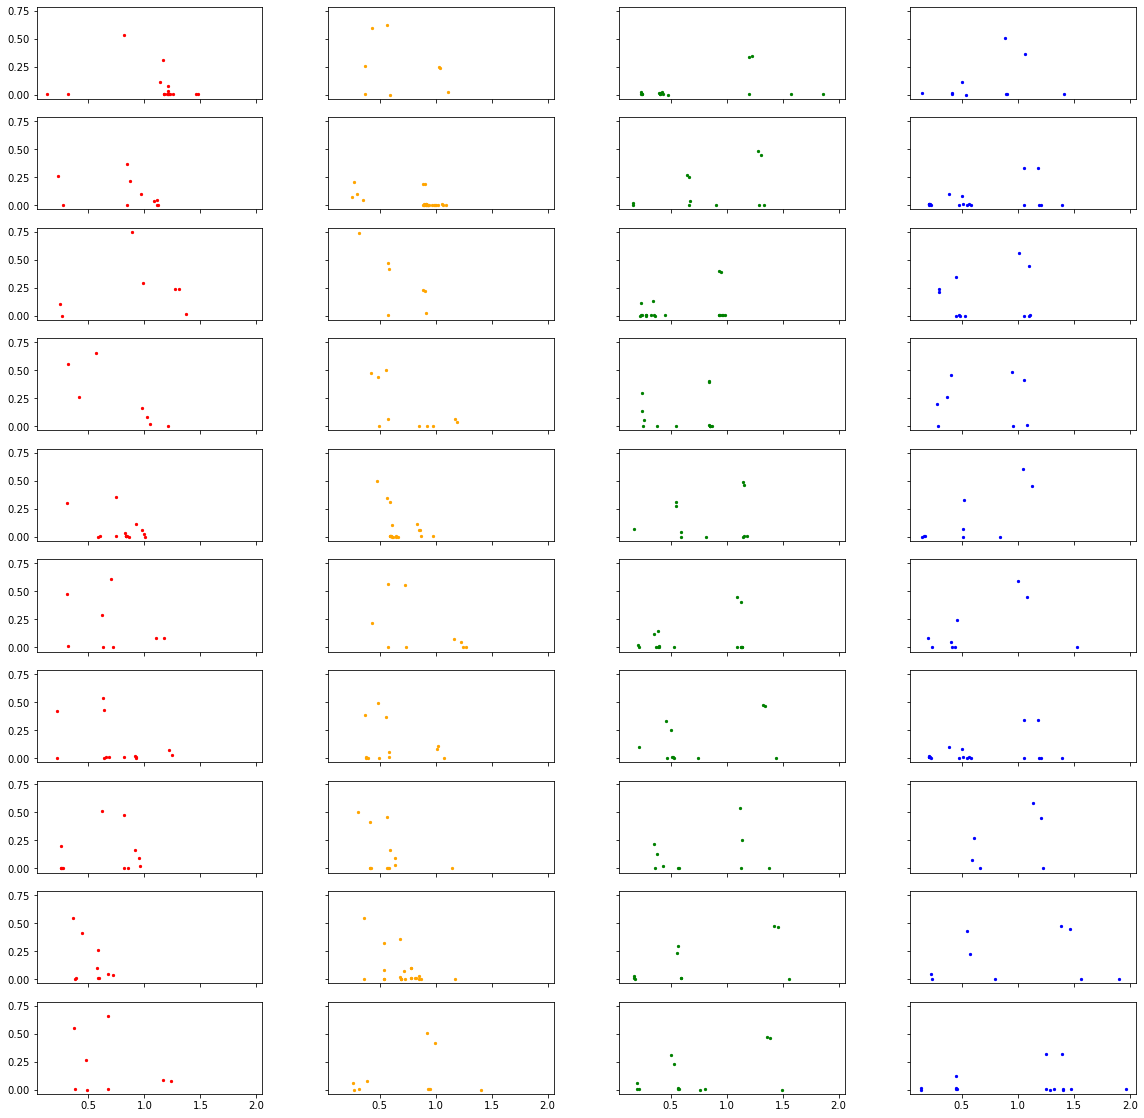

In [59]:
# plot examples
colors = ['red','orange','green','blue']
nrow = 10
fig,ax = plt.subplots(nrow,len(unique_labels),sharex = True, sharey = True,figsize = (20,20))

for i in range(nrow):
    for j in unique_labels:
        dgms = classes[j]
        random_idx = np.random.choice(len(dgms),1)[0]
        dgm = dgms[random_idx]
        ax[i,j].scatter(dgm[:,0],dgm[:,1]- dgm[:,0],c = colors[j],s = 5)
        #ax[i,j].plot([0,2],[0,2], linestyle = 'dashed', linewidth = 1, c = 'black')
        ax[i,j].set_aspect('equal')
plt.show()
plt.close()